# Analyses of multiple large populations using SIMULATED DATA

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pickle
import gzip
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [2]:
%ls Figures/

MultiSim-Large-1000_sim/         MultiSim-Ref-10k_sim/
MultiSim-Large-100_sim/          SAMPLED-MultiSim-Large-1000_sim/


## Load data (from WD_ELEMENTS hard drive!)

In [4]:
%ls /Volumes/WD_ELEMENTS/ThesisDataBackups/saved_simulations/

large-neutral-1000_MultiSim/         large-selection_0p2-1000_MultiSim/
large-neutral-100_MultiSim.pkl.gz*   large-selection_0p3-1000_MultiSim/
large-selection-100_MultiSim.pkl.gz* large-selection_1p5-1000_MultiSim/
large-selection_0p004-1000_MultiSim/ large-selection_3-1000_MultiSim/
large-selection_0p01-1000_MultiSim/  large-selection_6-1000_MultiSim/
large-selection_0p05-1000_MultiSim/


In [6]:
%%time

# SELECTION = 0.004 POPULATIONS
prefix = '/Volumes/WD_ELEMENTS/ThesisDataBackups/saved_simulations/large-selection_0p004-1000_MultiSim/'
selection_0p004 = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_0p004.append(data)
print(len(selection_0p004))
print(type(selection_0p004[0]))

100%|██████████| 1000/1000 [04:06<00:00,  4.05it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 2min, sys: 57.4 s, total: 2min 57s
Wall time: 4min 6s


In [ ]:
selection_0p004[0].head()

## Sample data

In [7]:
sample_size=10**6
detection_limit=100

In [9]:
%%time
for i in tqdm(range(len(selection_0p004))):
    selection_0p004[i] = sample(selection_0p004[i], sample_size, detection_limit)
print(len(selection_0p004))

100%|██████████| 1000/1000 [30:39<00:00,  1.84s/it]

1000
CPU times: user 29min 37s, sys: 25.4 s, total: 30min 3s
Wall time: 30min 39s


In [25]:
selection_0p004[0].head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,114802040,116402657,1.000000,0,165134,1.000000,"(0, 0, 0)",991302,1000000,1.000000
A.1,15,0.001,10456,10473,0.000090,1,11,1.024245,"(66, 127, 243)",75,75,0.000075
A.2,15,0.001,82121,82622,0.000710,1,113,1.058364,"(201, 29, 149)",747,747,0.000747
A.3,15,0.001,34020,34254,0.000294,1,54,0.929297,"(35, 81, 80)",287,287,0.000287
A.4,16,0.001,31906,32135,0.000276,1,49,0.992559,"(243, 186, 32)",298,298,0.000298


## Maximum allele frequencies

In [10]:
%%time
selection_0p004_MaxAFs = get_max_AFs(selection_0p004, sampled=True)

CPU times: user 1.36 s, sys: 23.5 ms, total: 1.38 s
Wall time: 1.42 s


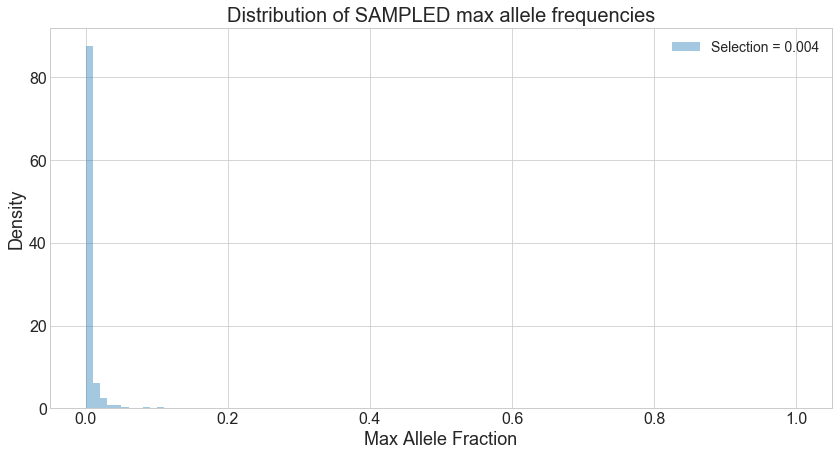

In [11]:
sns.distplot(selection_0p004_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 0.004");
plt.title('Distribution of SAMPLED max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p004-MaxAFs.png')
plt.show()

## Heterogeneity

In [12]:
%%time
selection_0p004_H = get_heterogeneity(selection_0p004, sampled=True)

CPU times: user 1.23 s, sys: 21.5 ms, total: 1.25 s
Wall time: 1.29 s


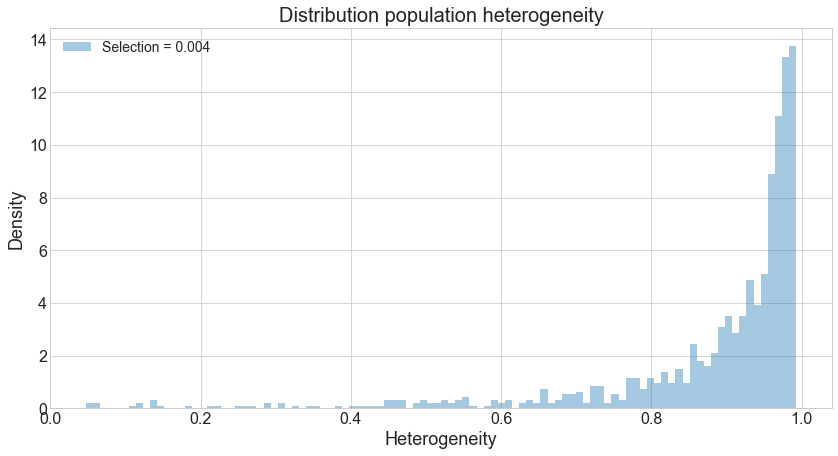

In [13]:
sns.distplot(selection_0p004_H, bins=100, norm_hist=True, kde=False, label="Selection = 0.004");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p004-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [14]:
%%time
selection_0p004_mut_distr = get_mutation_distributions(selection_0p004, sampled=True)

CPU times: user 1min 4s, sys: 695 ms, total: 1min 4s
Wall time: 1min 5s


In [15]:
selection_0p004_mut_distr.to_csv('../simulation_data/SAMPLED-Large-1000_sim-selection_0p004_mut_distr.csv')

In [16]:
selection_0p004_avg_nmd = selection_0p004_mut_distr.mean()
selection_0p004_std_nmd = selection_0p004_mut_distr.std()

In [17]:
%%time
selection_0p004_avg_num_mut = avg_num_mutations(selection_0p004_avg_nmd)

CPU times: user 1.19 ms, sys: 347 µs, total: 1.54 ms
Wall time: 1.88 ms


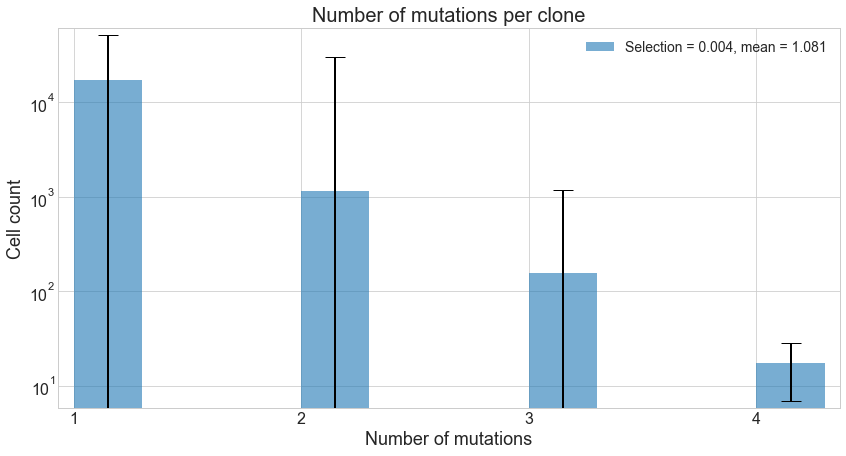

In [18]:
selection_0p004_errors = selection_0p004_std_nmd.values

plt.bar(left=selection_0p004_avg_nmd.index+0.15, height=selection_0p004_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=selection_0p004_errors, capsize=10, 
        label="Selection = 0.004, mean = %s" %(round(selection_0p004_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_0p004_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p004-Num_mutations.png')
plt.show()

## Total number of mutations

In [19]:
%%time
selection_0p004_total_m = get_total_mutations(selection_0p004, det_lim=1)

CPU times: user 949 ms, sys: 24.5 ms, total: 974 ms
Wall time: 1.12 s


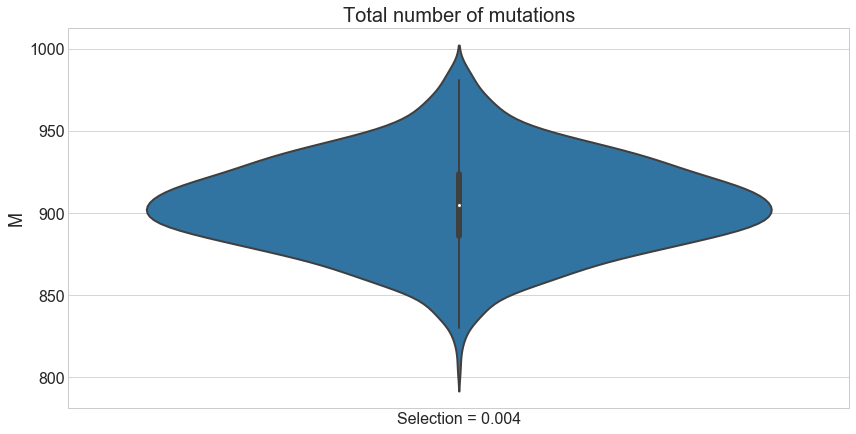

In [20]:
sns.violinplot(data=[selection_0p004_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 0.004"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p004-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [21]:
alpha = 0.3

In [22]:
%%time
selection_0p004_rec_errors = get_reconstruction_errors(selection_0p004, alpha, sampled=True)

CPU times: user 1min 31s, sys: 1.19 s, total: 1min 32s
Wall time: 1min 35s


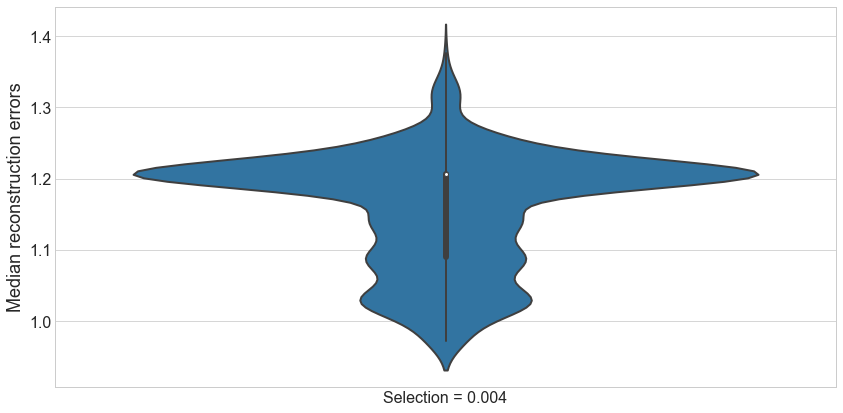

In [23]:
sns.violinplot(data=[selection_0p004_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 0.004"]);
plt.savefig('./Figures/SAMPLED-MultiSim-Large-1000_sim/SAMPLED-Large-selection_0p004-Rec_errors.png')
plt.show()

## Export data

In [24]:
d = pd.DataFrame()
d["selection_0p004_MaxAFs"] = selection_0p004_MaxAFs
d["selection_0p004_H"] = selection_0p004_H
d["selection_0p004_total_m"] = selection_0p004_total_m
d["selection_0p004_rec_errors"] = selection_0p004_rec_errors

d.to_csv('../simulation_data/SAMPLED-Large-selection_0p004-1000_sim-Analyzed_data.csv')